## Calculating the Return of a Portfolio of Securities

Load the data for a portfolio composed of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple *(5_stocks_2000_2017.csv)*.

In [1]:
from platform import python_version

In [2]:
python_version()

'3.8.0'

In [3]:
import numpy as np
import pandas as pd
# from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from csv_generator_notes import get_finance_data


In [4]:
start_date = int('2013' + '01' + '01')
end_date = int('2019' + '11' + '05')
# assets = ['btc.v', 'eth.v', 'dash.v', 'bch.v', 'ltc.v', 'xrp.v', 'xmr.v', 'zec.v']
# assets = ['uso.us', 'sco.us']
assets = ['qqq.us', 'qld.us', 'tqqq.us', 'psq.us', 'sqqq.us']

portfolio_data = get_finance_data(assets=assets, start_date=start_date, end_date=end_date)
portfolio_data.set_index('Date', inplace=True)

# portfolio_data = pd.read_csv('/Users/administrador/Documents/Finance/Herramientas/csv_generator/btc.v-eth.v-dash.v-bch.v-ltc.v-xrp.v-xmr.v-zec.v.csv', index_col='Date')

http://stooq.com/q/d/l/?s=qqq.us&d1=20130101&d2=20191105/qqq.us.csv
http://stooq.com/q/d/l/?s=qld.us&d1=20130101&d2=20191105/qld.us.csv
http://stooq.com/q/d/l/?s=tqqq.us&d1=20130101&d2=20191105/tqqq.us.csv
http://stooq.com/q/d/l/?s=psq.us&d1=20130101&d2=20191105/psq.us.csv
http://stooq.com/q/d/l/?s=sqqq.us&d1=20130101&d2=20191105/sqqq.us.csv


In [5]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1724 entries, 2013-01-02 to 2019-11-05
Data columns (total 5 columns):
QQQ.US     1724 non-null float64
QLD.US     1724 non-null float64
TQQQ.US    1724 non-null float64
PSQ.US     1724 non-null float64
SQQQ.US    1724 non-null float64
dtypes: float64(5)
memory usage: 80.8+ KB


In [6]:
portfolio_data.head()

,QQQ.US,QLD.US,TQQQ.US,PSQ.US,SQQQ.US
Date,,,,,
2013-01-02,62.560,14.438,4.7068,96.926,2272.01
2013-01-03,62.238,14.305,4.6383,97.318,2306.06
2013-01-04,62.029,14.200,4.5926,97.591,2328.94
2013-01-07,62.047,14.228,4.5976,97.551,2324.63
2013-01-08,61.927,14.188,4.5711,97.670,2337.63


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [7]:
portfolio_data.iloc[0]

QQQ.US       62.5600
QLD.US       14.4380
TQQQ.US       4.7068
PSQ.US       96.9260
SQQQ.US    2272.0100
Name: 2013-01-02, dtype: float64

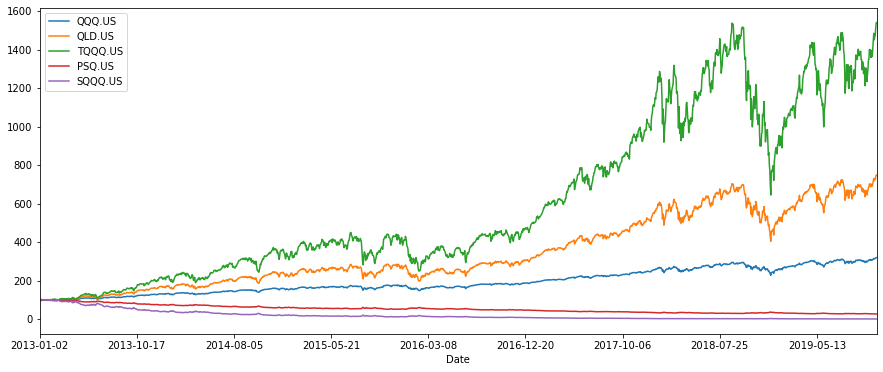

In [8]:
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize = (15,6))

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Simple returns of the securities

In [168]:
portfolio_returns = (portfolio_data / portfolio_data.shift(1)) - 1
portfolio_returns.tail()

,QQQ.US,QLD.US,TQQQ.US,PSQ.US,SQQQ.US
Date,,,,,
2019-10-30,0.004846,0.007988,0.014060,-0.003745,-0.013884
2019-10-31,0.000457,0.001528,0.000722,-0.000376,-0.000704
2019-11-01,0.009083,0.018686,0.027132,-0.009026,-0.027122
2019-11-04,0.006185,0.011511,0.017845,-0.006452,-0.018103
2019-11-05,0.000550,0.000370,0.001242,0.000000,-0.000737


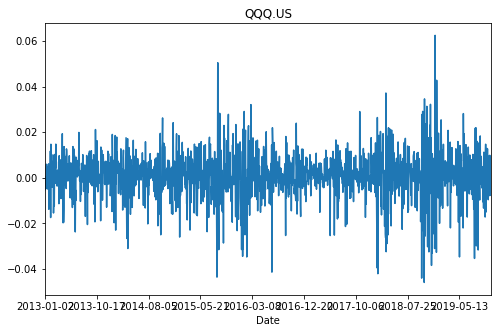

Annual Avg Returns
18.184 %


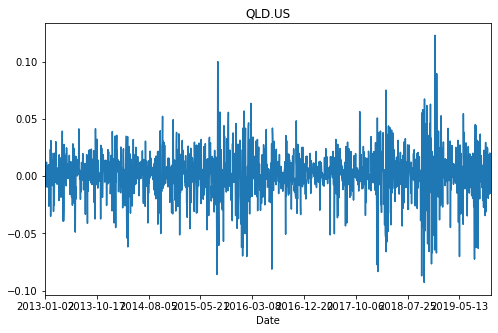

Annual Avg Returns
34.385 %


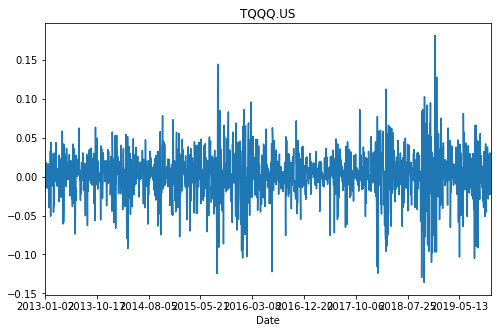

Annual Avg Returns
51.23799999999999 %


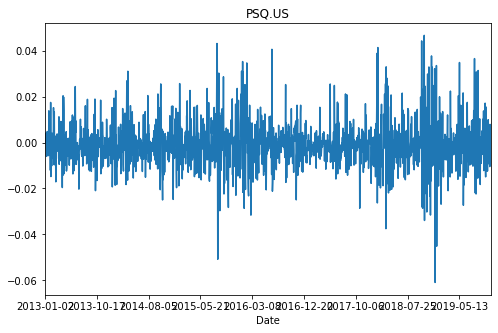

Annual Avg Returns
-17.698 %


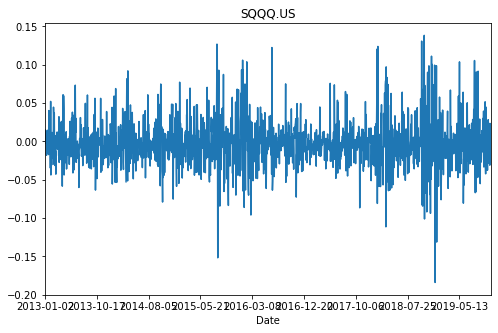

Annual Avg Returns
-52.701 %

Annual Volatility (std)
QQQ.US     0.161124
QLD.US     0.320357
TQQQ.US    0.478164
PSQ.US     0.160660
SQQQ.US    0.480093
dtype: float64

Annual Risk
QQQ.US     2.547587
QLD.US     5.065296
TQQQ.US    7.560444
PSQ.US     2.540252
SQQQ.US    7.590930
dtype: float64


In [169]:
for key in portfolio_returns: 
    
    portfolio_returns[key].plot(figsize=(8, 5))
    plt.title(key)
    plt.show()
    annual_avg_return = portfolio_returns.mean() * 250
    print("Annual Avg Returns")    
    print(str(round(annual_avg_return[key], 5) * 100) + ' %')
print()
print('Annual Volatility (std)')
print(portfolio_returns.std() * 250 ** 0.5)
print()
print('Annual Risk')
print(portfolio_returns.std() * 250)
    

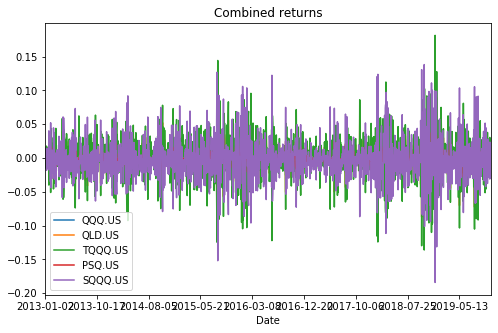

In [170]:
for key in portfolio_returns: 
    
    portfolio_returns[key].plot(figsize=(8, 5))
plt.title('Combined returns')
plt.legend(portfolio_returns.keys())
plt.show()

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [37]:
weights = np.array([0.20, 0.30, 0.20, 0.20, 0.10])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

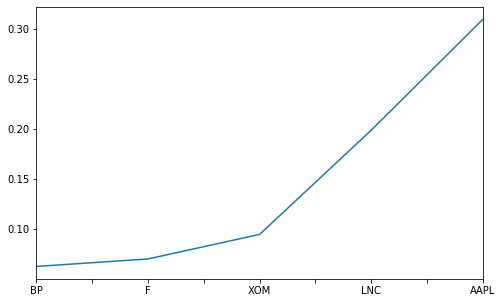

In [38]:
annual_returns = portfolio_returns.mean() * 250
annual_returns.head()
annual_returns.plot(figsize=(8, 5))

### Return of a portfolio

In [39]:
np.dot(annual_returns, weights)

0.12310033933289037

In [40]:
portfolio_return  = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
portfolio_return

'12.31 %'

In [41]:
cov_matrix_anual = portfolio_returns.cov() * 250
cov_matrix_anual

,BP,F,XOM,LNC,AAPL
BP,0.079305,0.035976,0.047954,0.057300,0.027714
F,0.035976,0.180890,0.030863,0.093179,0.046810
XOM,0.047954,0.030863,0.058614,0.050471,0.026174
LNC,0.057300,0.093179,0.050471,0.280214,0.054486
AAPL,0.027714,0.046810,0.026174,0.054486,0.171563


In [42]:
corr_matrix = portfolio_returns.corr()
corr_matrix

,BP,F,XOM,LNC,AAPL
BP,1.000000,0.300365,0.703359,0.384378,0.237598
F,0.300365,1.000000,0.299729,0.413872,0.265716
XOM,0.703359,0.299729,1.000000,0.393823,0.261010
LNC,0.384378,0.413872,0.393823,1.000000,0.248500
AAPL,0.237598,0.265716,0.261010,0.248500,1.000000


## Calculating Portfolio Risk


In [55]:
portfolio_variance = np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))
portfolio_variance

0.0735248377926543

In [56]:
portfolio_volatility = (np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))) ** 0.5
portfolio_volatility

0.27115463815441976

### Portfolio Risk

In [57]:

print(str(round(portfolio_volatility, 5) * 100) + ' %')

27.115000000000002 %


## Calculating Diversifiable and Non-Diversifiable Risk of a Portfoli

In [58]:
anual_variances_with_weights = {}
weight_counter = 0
for key in portfolio_returns:
    anual_variances_with_weights[key] = portfolio_returns[key].var() * 250, weights[weight_counter]
    weight_counter += 1

anual_variances_with_weights


{'BP': (0.07930548460970487, 0.2),
 'F': (0.18089044346045402, 0.3),
 'XOM': (0.05861365692037635, 0.2),
 'LNC': (0.28021397043530194, 0.2),
 'AAPL': (0.17156268896807073, 0.1)}

In [67]:
diversifiable_risk = portfolio_variance
for key, value in anual_variances_with_weights.items():
    
    weighted_v = (value[1] ** 2 * value[0])
    
    diversifiable_risk -= weighted_v
#     print(weighted_v)
diversifiable_risk

0.038803746512917396

### Diversified Risk

In [68]:
print (str(round(diversifiable_risk*100, 3)) + ' %')

3.88 %


## Calculating Non-diversifiable Risk 

In [70]:
non_diversifiable_risk = portfolio_variance - diversifiable_risk
non_diversifiable_risk

0.0347210912797369

In [75]:
print (str(round(non_diversifiable_risk*100, 3)) + ' %')

3.472 %


### Checking the results

In [73]:
risk_sum = 0
for key, value in anual_variances_with_weights.items():
    risk_sum += (value[1] ** 2 * value[0])
risk_sum

0.0347210912797369

In [74]:
non_diversifiable_risk == risk_sum

True